# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
#!pip install citipy
#!pip install --upgrade matplotlib
#!pip install citipy
#!pip matplotlib.pyplot

In [7]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
import time
from scipy.stats import linregress
time.sleep(20) #20 second

# import the openWeatherMap API key
from api_keys import weather_api_key
from citipy import citipy
weather_api_key

ModuleNotFoundError: No module named 'matplotlib'

### Generate the Cities List by Using the `citipy` Library

In [69]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0],lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0],lng_range[1],size = 1500)

lat_lngs = zip(lats,lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # if the city is unique, then add it to a our city list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'Number of cities in the list: {len(cities)}')
       
    

Number of cities in the list: 621


In [73]:
cities

['mga',
 "nar'yan-mar",
 'albany',
 'waitangi',
 'bamnet narong',
 'banda aceh',
 'whitehorse',
 'iqaluit',
 'costa calma',
 'ixtapa',
 'taiohae',
 'adamstown',
 'kourou',
 'kerikeri',
 "port saint john's",
 'port-aux-francais',
 'yellowknife',
 'west island',
 'port elizabeth',
 'tolanaro',
 'iskateley',
 'ribeira grande',
 'vingt cinq',
 'hami',
 'ilulissat',
 'puerto yuca',
 'edinburgh of the seven seas',
 'pisco',
 'ermelo',
 'mokopane',
 'tvoroyri',
 'touros',
 'tiksi',
 'puerto natales',
 'thompson',
 'egilsstadir',
 'coahuayana de hidalgo',
 'mejit',
 'grytviken',
 'zhangjiajie',
 'faranah',
 'new norfolk',
 'pangody',
 'enewetak',
 'olonkinbyen',
 'broome',
 'lata',
 'jamestown',
 'villa de soto',
 'dogondoutchi',
 'qaqortoq',
 'taupo',
 'cotonou',
 'port lincoln',
 'sevastopol',
 'kwang binh',
 'vernon',
 'constantia',
 'mathba',
 'gaigeturi',
 'sampit',
 'spas-demensk',
 'vredendal',
 'kapuskasing',
 'hamilton',
 'nahiyat ash shinafiyah',
 'harper',
 'puerto ayora',
 'lihue',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [77]:
# Starting URL for Weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
# Print (url)


# List of City Data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)



# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in list
for index, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass

    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | mga
Processing Record 2 of Set 1 | nar'yan-mar
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | bamnet narong
Processing Record 6 of Set 1 | banda aceh
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | costa calma
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 10 of Set 1 | ixtapa
Processing Record 11 of Set 1 | taiohae
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | kourou
Processing Record 14 of Set 1 | kerikeri
Processing Record 15 of Set 1 | port saint john's
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | west island
P

In [85]:
# Convert the cities weather data from array of JSON into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.count()


City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Windspeed     596
Country       596
Date          596
dtype: int64

In [86]:
# Summary description of the data
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,5.960000e+02
mean,18.884857,20.186782,63.585872,68.991611,56.892617,8.635721,1.714280e+09
std,32.146370,86.997235,18.665902,23.275224,39.873816,5.610193,6.665677e+01
min,-54.800000,-176.559700,11.350000,4.000000,0.000000,0.000000,1.714279e+09
25%,-5.991100,-52.803450,49.550000,55.750000,14.000000,4.470000,1.714280e+09
50%,22.262450,25.941650,64.525000,75.000000,69.000000,7.685000,1.714280e+09
75%,45.866675,93.037500,78.797500,86.250000,99.000000,11.500000,1.714280e+09
max,78.218600,177.483300,108.340000,100.000000,100.000000,39.080000,1.714280e+09


In [82]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,mga,59.7500,31.0667,49.93,69,71,7.34,RU,1714279640
1,nar'yan-mar,67.6713,53.0870,20.10,93,67,10.00,RU,1714279641
2,albany,42.6001,-73.9662,51.10,64,100,1.99,US,1714279462
3,waitangi,-43.9535,-176.5597,53.82,87,33,3.00,NZ,1714279641
4,bamnet narong,15.4992,101.6897,103.77,26,1,13.62,TH,1714279641


In [84]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [87]:
# Read back saved data for use in plotting
city_data_df = pd.read_csv ("output_data/cities.csv", index_col="City_ID")


# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,mga,59.7500,31.0667,49.93,69,71,7.34,RU,1714279640
1,nar'yan-mar,67.6713,53.0870,20.10,93,67,10.00,RU,1714279641
2,albany,42.6001,-73.9662,51.10,64,100,1.99,US,1714279462
3,waitangi,-43.9535,-176.5597,53.82,87,33,3.00,NZ,1714279641
4,bamnet narong,15.4992,101.6897,103.77,26,1,13.62,TH,1714279641


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

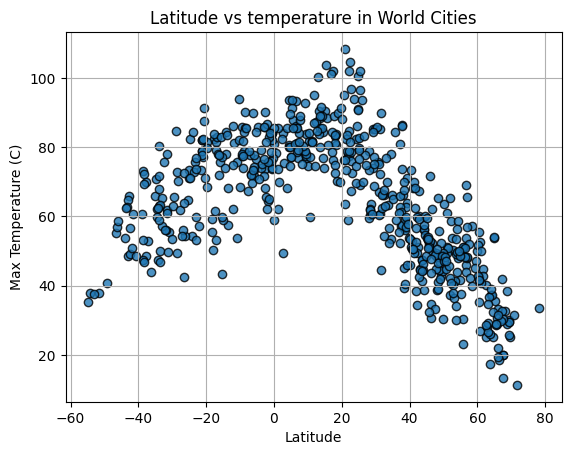

In [104]:
# build scatter plot for latitude vs. temperature

# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",
            edgecolor="black", linewidth=1,alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("Latitude vs temperature in World Cities")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")


# Show plot
plt.show()

#### Latitude Vs. Humidity

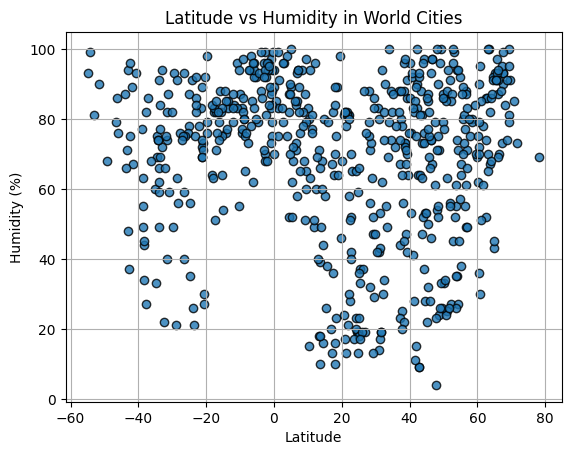

In [105]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",
            edgecolor="black", linewidth=1,alpha=0.8, label="Cities")
            
# Incorporate the other graph properties
# Incorporate the other graph properties
plt.title("Latitude vs Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

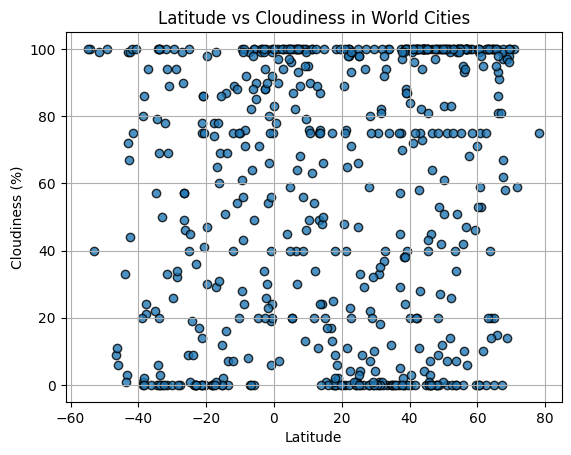

In [106]:
# Build the scatter plots for latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",
            edgecolor="black", linewidth=1,alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

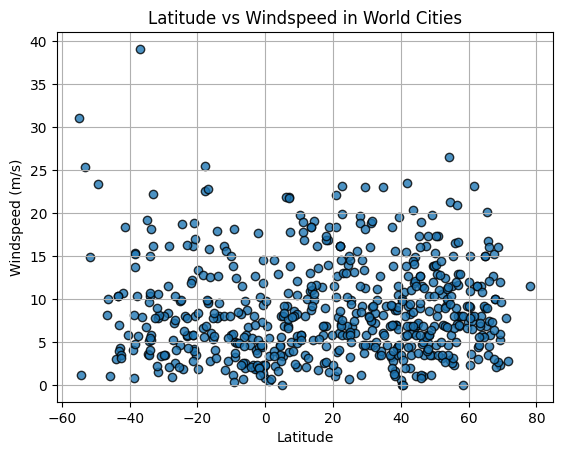

In [107]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Windspeed"], marker="o",
            edgecolor="black", linewidth=1,alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude vs Windspeed in World Cities")
plt.ylabel("Windspeed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship


In [181]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,x_label, y_label,title,text_coordinates):

    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    # plt.scatter(x_values,y_values)
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [179]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,mga,59.7500,31.0667,49.93,69,71,7.34,RU,1714279640
1,nar'yan-mar,67.6713,53.0870,20.10,93,67,10.00,RU,1714279641
2,albany,42.6001,-73.9662,51.10,64,100,1.99,US,1714279462
4,bamnet narong,15.4992,101.6897,103.77,26,1,13.62,TH,1714279641
5,banda aceh,5.5577,95.3222,87.91,68,87,6.85,ID,1714279641


In [169]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,53.82,87,33,3.00,NZ,1714279641
9,adamstown,-25.0660,-130.1015,71.02,87,100,9.73,PN,1714279642
11,kerikeri,-35.2268,173.9474,65.91,60,22,6.71,NZ,1714279642
12,port saint john's,-31.6229,29.5448,61.75,82,33,10.54,ZA,1714279642
13,port-aux-francais,-49.3500,70.2167,40.86,68,100,23.42,TF,1714279643


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8462113411819338


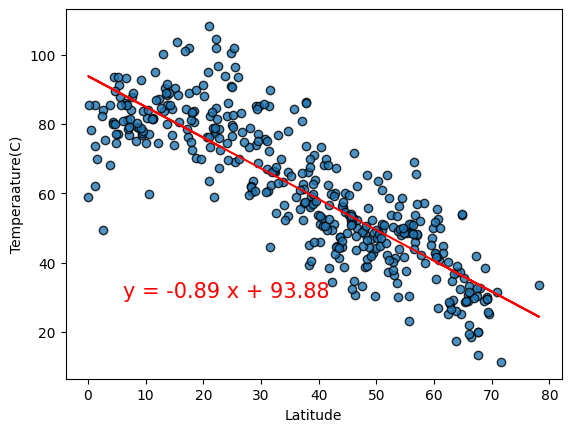

In [204]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Temperaature(C)", "Northern", (6, 30))


The r-squared is: 0.6557819389550786


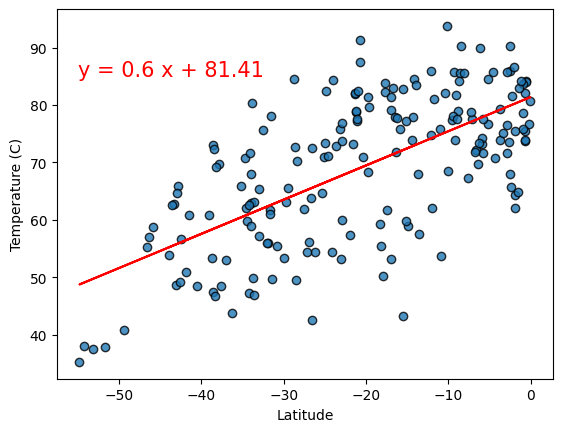

In [205]:
# Create a scatter plot for latitude vs max temp (Southern hemisphere)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Temperature (C)", "Southern", (-55, 85))

**Discussion about the linear relationship:** 

For the two graphs, model was fitted to determine the relationship between temperature and cities latitude. The result shows that there is strong relationship between latitude and maximum temperature both in northern and Southern Hemisphere. In The northern part of the global, the correlation is negative while in the southern Hemisphere the correlation is positive. The results suggest that maximum temperature increases as one approaches the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.12774232272973726


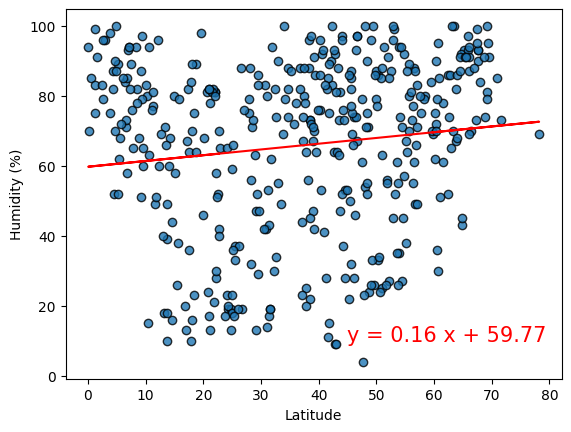

In [208]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern", (45, 10))

The r-squared is: 0.34043682145950194


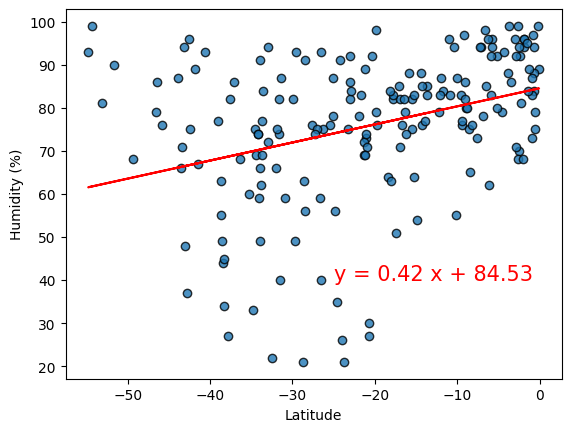

In [207]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern", (-25, 40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

For the two graphs, model was fitted to determine the relationship between latitude and cities Humdidity. There is weak relationship between latitude and humidity in the norther hemisphere. In the southern Hemisphere, the relationship is moderate relationship, with positive correlation which suggest slight increase in humidity moving towards equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.09209489617166597


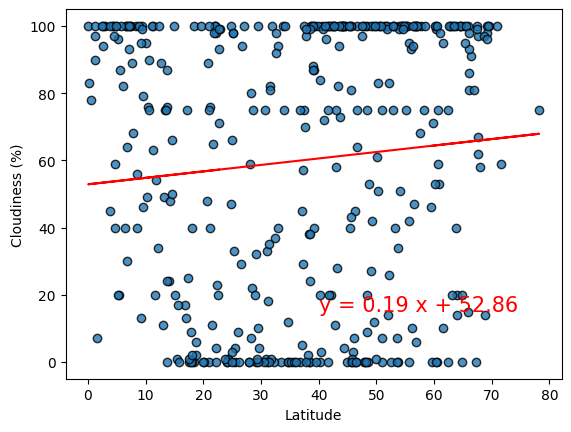

In [209]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (40, 15))

The r-squared is: 0.13144662919536315


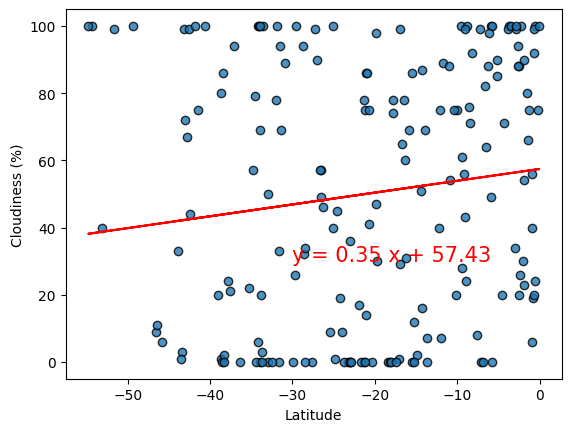

In [210]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Southern", (-30, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

For the two graphs, model was fitted to determine the relationship between latitude and amount of cloud cover. This set of data shows that data is so spread to have any meangiful relationship. We can say there is limited relationship cloudiness and latitude both northern and souther hemisphere. Cloudiness is not dependent how far or closer to equator based on this data

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.010170289898806873


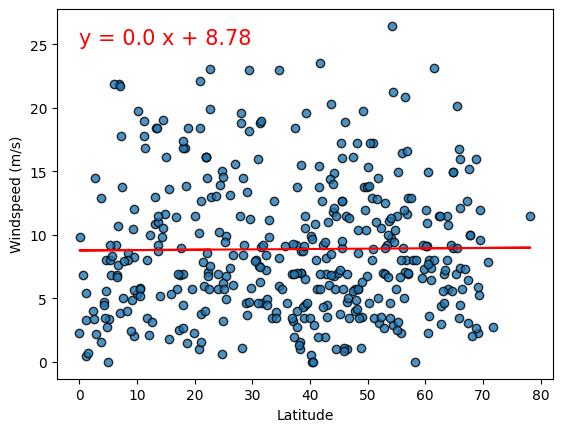

In [214]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Windspeed"]
plot_linear_regression(x_values, y_values, "Latitude", "Windspeed (m/s)", "Northern", (0, 25))

The r-squared is: -0.26021495915503284


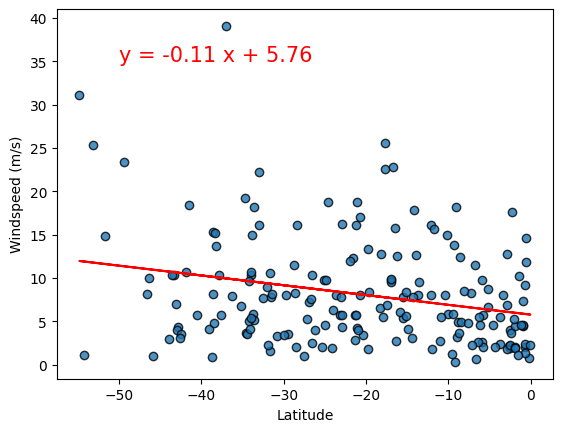

In [213]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Windspeed"]
plot_linear_regression(x_values, y_values, "Latitude", "Windspeed (m/s)", "Southern", (-50, 35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

For the two graphs, model was fitted to determine the relationship between wind speed and latitude. There is no relationship between wind speed and latitude in northern hemisphere. However, we observed some weak relationship between these two element in the southern hemisphere. this correlation appears to be in negativee direction, as one approaches equator, the wind speed reduces. 